# 1. Import Library

In [54]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [82]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [83]:
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [84]:
x_train_normalize = x_img_train.astype('float32') / 255.0
x_test_normalize = x_img_test.astype('float32') / 255.0

In [85]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [86]:
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [87]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [88]:
model = Sequential()

In [89]:
#卷積層1

In [90]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [91]:
model.add(Dropout(rate=0.25))

In [92]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [93]:
#卷積層2與池化層2

In [94]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [95]:
model.add(Dropout(0.25))

In [96]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [97]:
#Step3	建立神經網路(平坦層、隱藏層、輸出層)

In [98]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [99]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [100]:
model.add(Dense(10, activation='softmax'))

In [108]:
1*(16*5*5)+16
# 18496=32*(64*3*3)+64
# 4096=8*8*64
# 4195328=4096*1024+1024
# 10250=1024*10+10

416

In [101]:
print(model.summary())
# 896=3*(32*3*3)+32
# 18496=32*(64*3*3)+64
# 4096=8*8*64
# 4195328=4096*1024+1024
# 10250=1024*10+10

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)             

# 訓練模型

In [102]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [103]:
train_history=model.fit(x_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1)          

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 120s 3ms/step - loss: 1.5772 - accuracy: 0.4295 - val_loss: 1.3655 - val_accuracy: 0.5502
Epoch 2/10
40000/40000 [==============================] - 112s 3ms/step - loss: 1.2017 - accuracy: 0.5728 - val_loss: 1.2294 - val_accuracy: 0.6010
Epoch 3/10
40000/40000 [==============================] - 108s 3ms/step - loss: 1.0412 - accuracy: 0.6312 - val_loss: 1.0522 - val_accuracy: 0.6591
Epoch 4/10
40000/40000 [==============================] - 121s 3ms/step - loss: 0.9257 - accuracy: 0.6731 - val_loss: 0.9922 - val_accuracy: 0.6744
Epoch 5/10
40000/40000 [==============================] - 111s 3ms/step - loss: 0.8313 - accuracy: 0.7092 - val_loss: 0.9043 - val_accuracy: 0.7009
Epoch 6/10
40000/40000 [==============================] - 113s 3ms/step - loss: 0.7427 - accuracy: 0.7390 - val_loss: 0.8979 - val_accuracy: 0.7123
Epoch 7/10
40000/40000 [==============================] - 118s

In [132]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

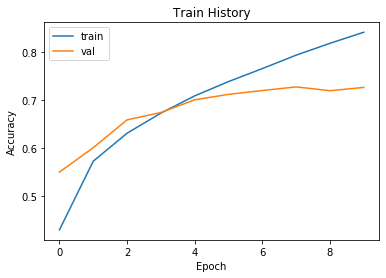

In [133]:
show_train_history('accuracy','val_accuracy')

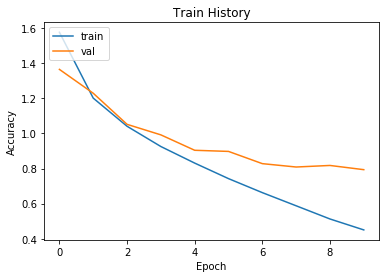

In [134]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [125]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
print("Accuracy=", scores[1])

Accuracy= 0.7289000153541565


# 進行預測

In [109]:
prediction=model.predict_classes(x_img_test_normalize)

In [110]:
print(prediction[:10]) 

[3 8 8 0 6 6 1 6 3 1]


In [131]:
print(y_label_test[:10])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [129]:
print(y_label_test[:10].reshape(-1))  

[3 8 8 0 6 6 1 6 3 1]


# confusion matrix

In [118]:
prediction.shape

(10000,)

In [119]:
y_label_test.shape

(10000, 1)

In [130]:
y_label_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

In [121]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [135]:
import pandas as pd
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,777,10,43,27,18,3,11,7,68,36
1,22,795,11,31,7,10,14,6,33,71
2,61,1,646,77,79,38,57,24,15,2
3,13,3,63,639,61,117,66,23,10,5
4,13,2,84,80,704,26,46,35,10,0
5,6,1,77,249,53,534,34,40,5,1
6,3,2,48,58,30,16,834,6,2,1
7,15,2,43,59,90,35,10,738,3,5
8,54,20,14,24,11,7,6,2,841,21
